In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [4]:
print(df.shape)

(545, 13)


In [5]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [6]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
x=df.drop('price',axis=1)
print(x)
y=df['price']
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [8]:
 #7 Encoding categorical data in X
categorical_col=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df_encode=pd.get_dummies(df,columns=categorical_col,drop_first=True)
df_encode.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


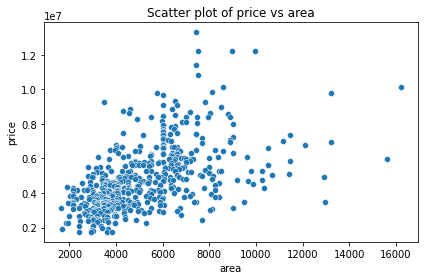

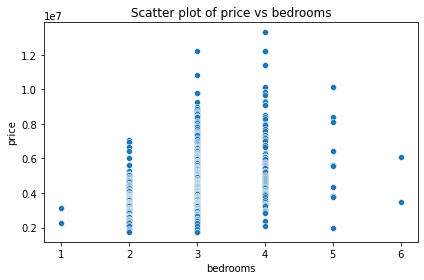

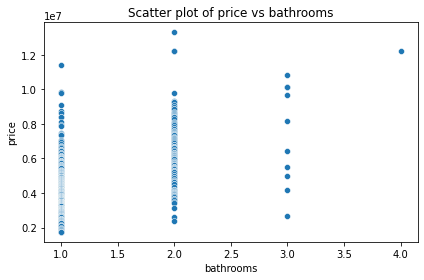

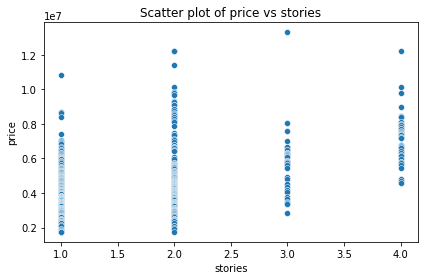

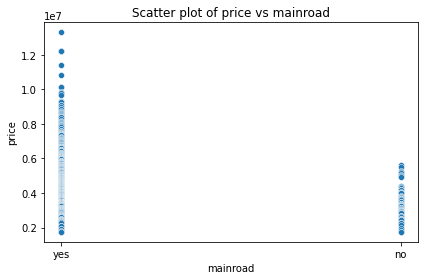

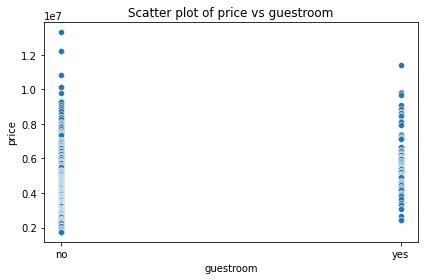

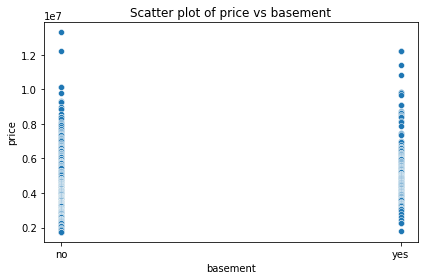

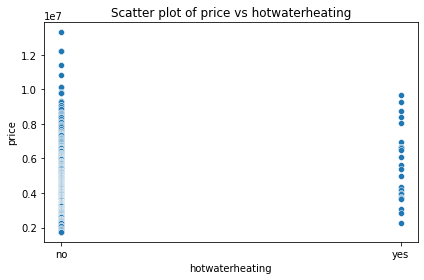

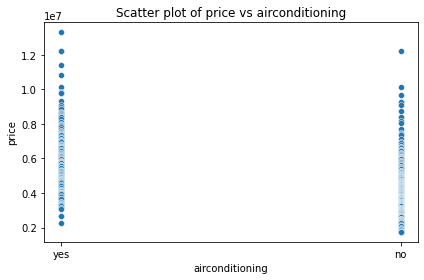

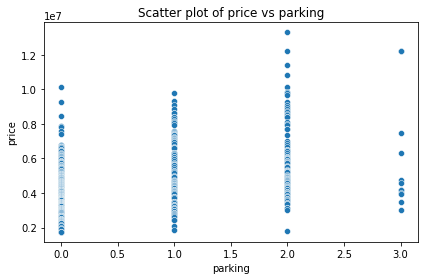

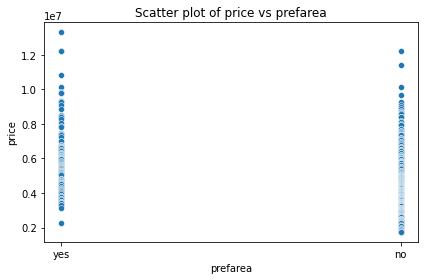

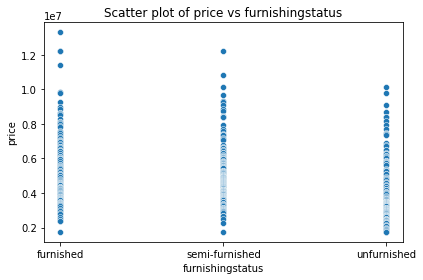

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
dependent_var='price'
independent_vars=df.columns[df.columns !=dependent_var]

for var in independent_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(df,x=var,y=dependent_var)
    plt.title(f'Scatter plot of {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.tight_layout()
    plt.show()

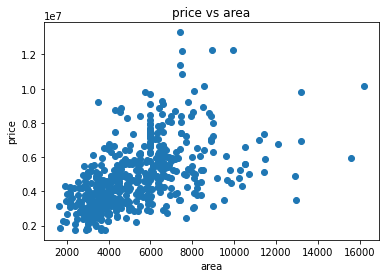

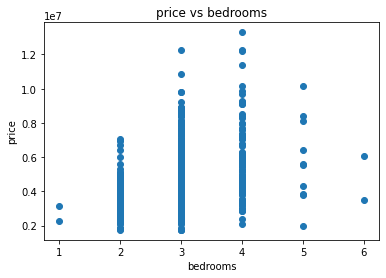

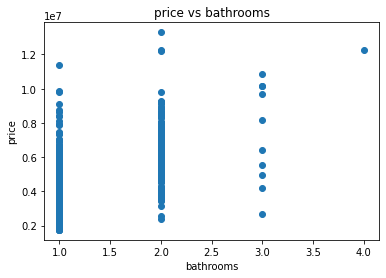

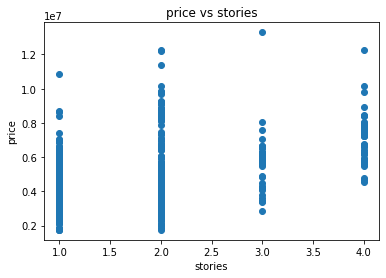

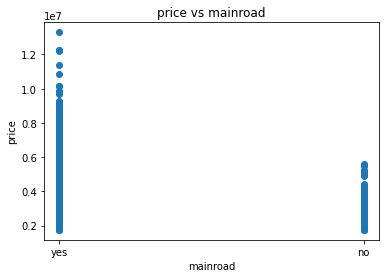

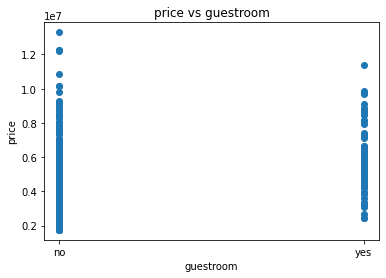

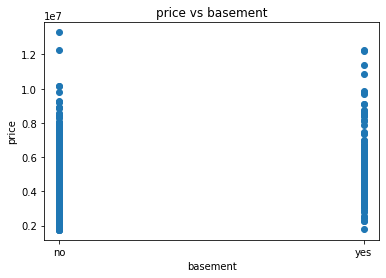

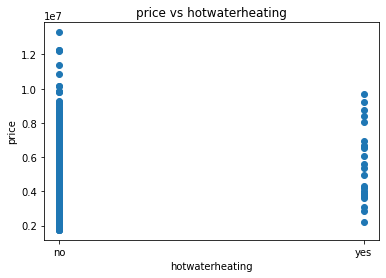

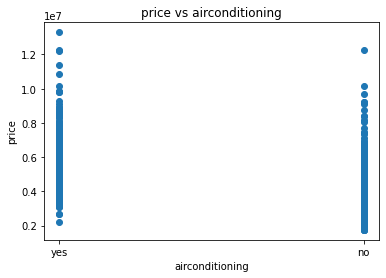

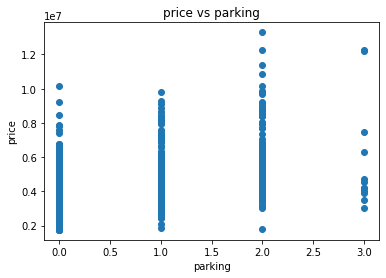

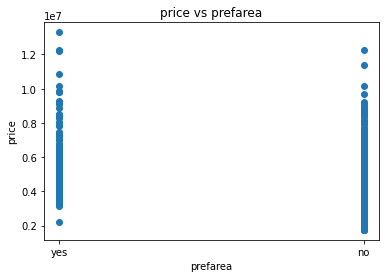

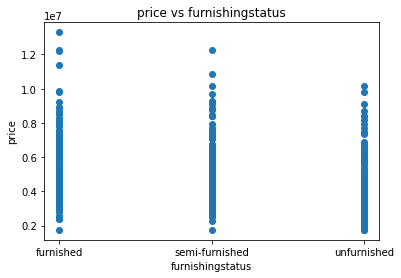

In [10]:


# Load the dataset
df = pd.read_csv("Housing.csv")

# Assume 'price' is the dependent variable (target)
# Change 'price' to your actual target column if needed
target = 'price'

# Loop through each column except the target
for column in df.columns:
    if column != target:
        plt.scatter(df[column], df[target])
        plt.title(f'{target} vs {column}')
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()


In [11]:
#Avoiding the Dummy Variable Trap.... uusig the code make safely encode categorical variable and avoid the dummies variable trap
df=pd.get_dummies(df,drop_first=True)
print(df)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2          True   
1    12250000  8960         4          4        4        3          True   
2    12250000  9960         3          2        2        2          True   
3    12215000  7500         4          2        2        3          True   
4    11410000  7420         4          1        2        2          True   
..        ...   ...       ...        ...      ...      ...           ...   
540   1820000  3000         2          1        1        2          True   
541   1767150  2400         3          1        1        0         False   
542   1750000  3620         2          1        1        0          True   
543   1750000  2910         3          1        1        0         False   
544   1750000  3850         3          1        2        0          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0        

In [12]:
#9 Apply feature scaling on numerical variables
# apply featue scaling
from sklearn.preprocessing import StandardScaler

df=pd.get_dummies(df,drop_first=True)
numerical_col=df.select_dtypes(include=['int64','float64']).columns

scaler=StandardScaler()

df[numerical_col]=scaler.fit_transform(df[numerical_col])
print(df.head())

      price      area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  4.566365  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  4.004484  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  4.004484  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  3.985755  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  3.554979  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingst

In [13]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.get_dummies(df,drop_first=True)
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
print("Model trained successfully")


Model trained successfully


In [14]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(x_train)
train_error=y_pred-y_train
print(train_error.head())

454    0.607505
392    0.065495
231   -0.381521
271   -0.588657
250   -0.315543
Name: price, dtype: float64


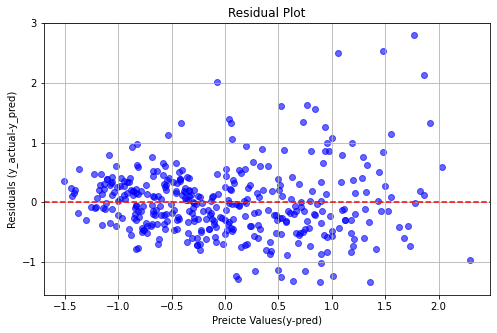

In [15]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

y_pred=model.predict(x_train)
residuals=y_train-y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred,residuals,color='blue',alpha=0.6)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Preicte Values(y-pred)')
plt.ylabel('Residuals (y_actual-y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()